In [1]:
import pandas as pd
import numpy as np

In [15]:
pip install numpy seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix)


In [5]:
df = pd.read_csv('./Heart_disease_cleveland_new.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [6]:
df = df.dropna()
df.shape

(303, 14)

In [7]:
X = df.drop('target',axis=1)
y = df['target']

In [8]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [9]:
X_scaled

array([[ 0.94872647,  0.68620244, -2.25177456, ...,  2.27457861,
        -0.71113139,  0.17622495],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         2.5048807 , -0.87075858],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  0.64911323,
         1.43287667,  1.22320848],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.64911323,
         0.36087264,  1.22320848],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.64911323,
         0.36087264, -0.87075858],
       [-1.82174501,  0.68620244, -0.16526786, ..., -0.97635214,
        -0.71113139, -0.87075858]], shape=(303, 13))

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
# Define models
models = {
    'SVM': SVC(kernel='rbf', probability=True),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
}

In [12]:

# Train and evaluate each model
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    })


In [13]:
# Convert to DataFrame for comparison
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df.to_string(index=False))


Model Performance Comparison:

              Model  Accuracy  Precision  Recall  F1-Score
                KNN  0.918033   0.935484 0.90625  0.920635
                SVM  0.901639   0.933333 0.87500  0.903226
Logistic Regression  0.885246   0.878788 0.90625  0.892308
        Naive Bayes  0.852459   0.896552 0.81250  0.852459
     Neural Network  0.770492   0.800000 0.75000  0.774194
      Decision Tree  0.754098   0.774194 0.75000  0.761905


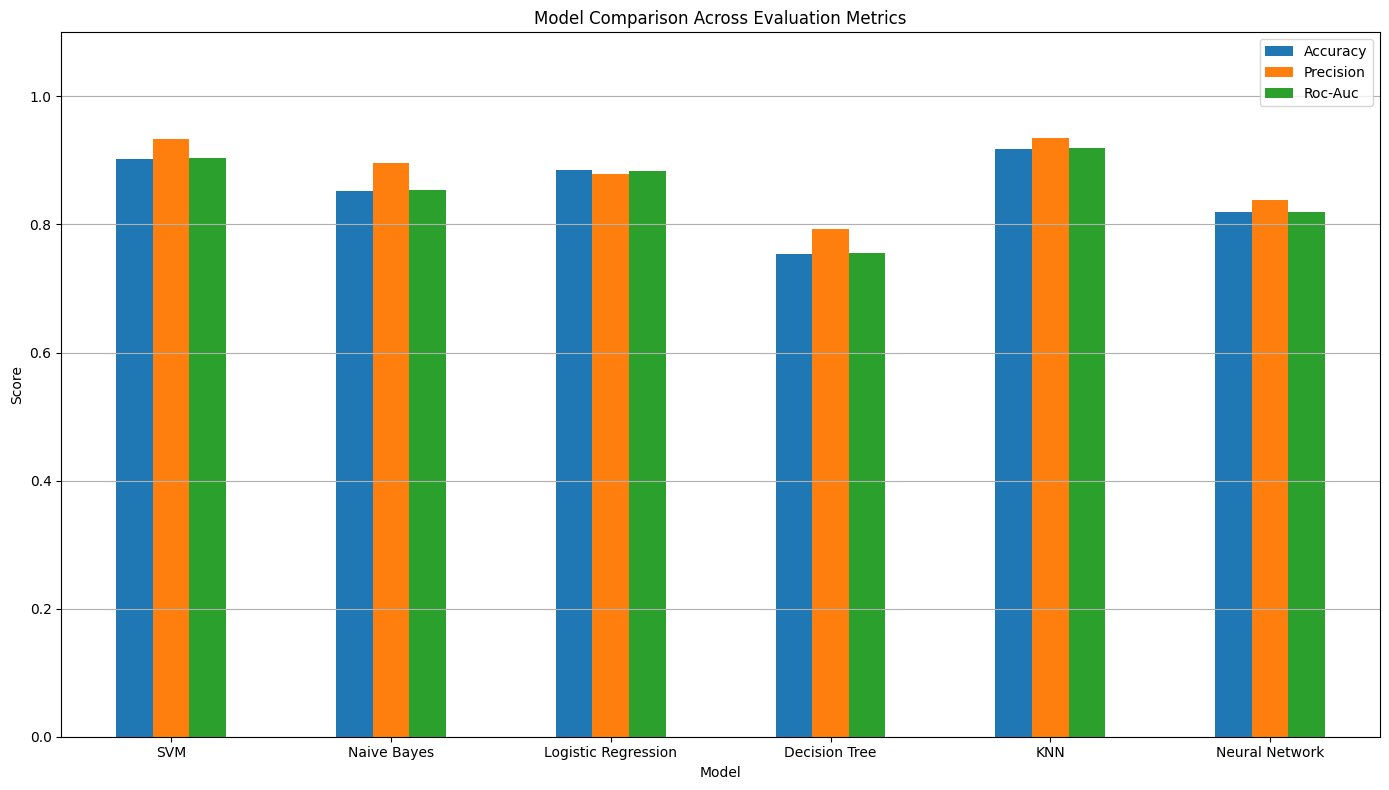

In [24]:
metrics_data = []
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    metrics_data.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Roc-Auc' : roc_auc_score(y_test,y_pred)
    })

    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics_data).set_index('Model')

# Bar plot of metrics
metrics_df.plot(kind='bar', figsize=(14, 8), )
plt.title("Model Comparison Across Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



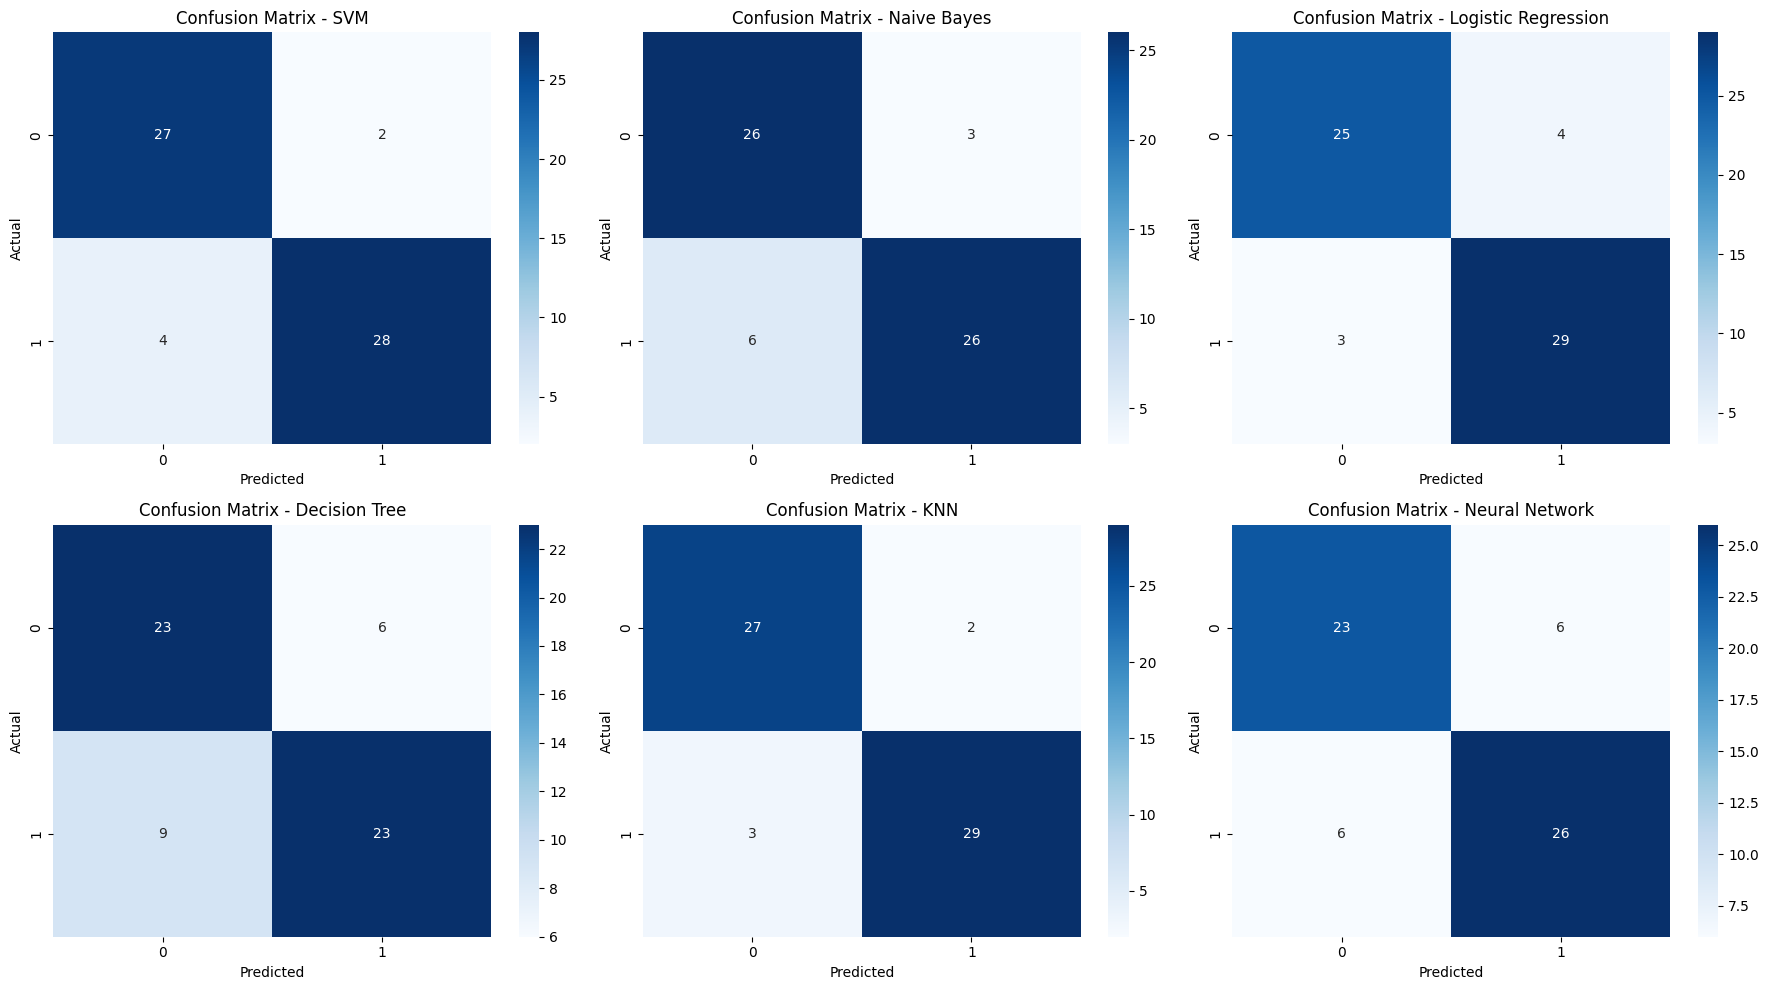

In [20]:

# Confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, (name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()
